# ee627 midterm

> I pledge my Honor that I have abided by the Stevens Honor System. - Joshua Schmidt 3/27/21

In [81]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## quesion 2

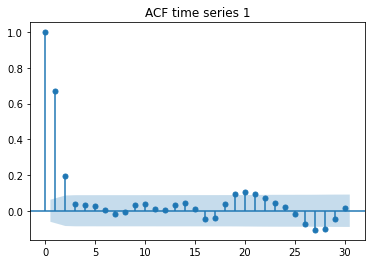

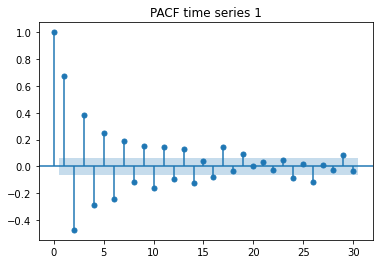

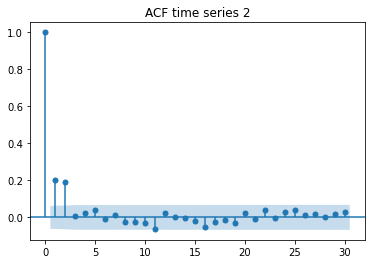

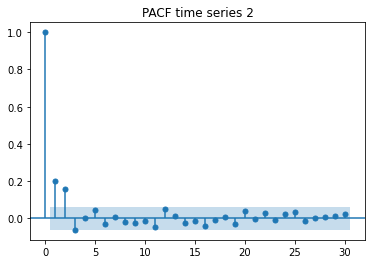

In [87]:
num_samples = 1000

samples_1 = np.random.normal(scale=1, size=num_samples)
samples_2 = np.random.normal(scale=9**.5, size=num_samples)
data_1 = np.array([], dtype=np.float)
data_2 = np.array([], dtype=np.float)

for i in range(num_samples):
    curr_1 = samples_1[i]
    curr_2 = samples_2[i]
    if i > 0:
        curr_1 += 5 / 2. * samples_1[i - 1]
        curr_2 += 1 / 6. * samples_2[i - 1]
    if i > 1:
        curr_1 += 3 / 2. * samples_1[i - 2]
        curr_2 += 1 / 6. * samples_2[i - 2]
    data_1 = np.append(data_1, curr_1)
    data_2 = np.append(data_2, curr_2)
plot_acf(data_1)
plt.title('ACF time series 1')
plt.show()
plot_pacf(data_1)
plt.title('PACF time series 1')
plt.show()
plot_acf(data_2)
plt.title('ACF time series 2')
plt.show()
plot_pacf(data_2)
plt.title('PACF time series 2')
plt.show()

## question 3

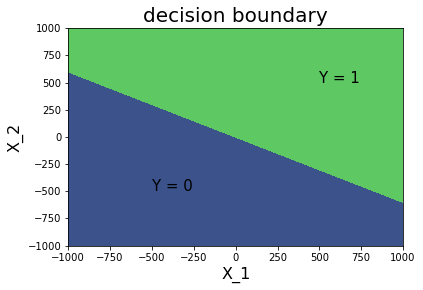

In [53]:
start, end, precision = -1000, 1000, 1000
x = np.linspace(start, end, precision)
y = np.linspace(start, end, precision)
X, Y = np.meshgrid(x, y)
B = 3*X + 5*Y + 15

plt.contourf(X, Y, B, 0)
plt.title('decision boundary', fontsize=20)
plt.xlabel('X_1', fontsize=16)
plt.ylabel('X_2', fontsize=16)
ax = plt.gca()
ax.text(500, 500, 'Y = 1', fontsize=15)
ax.text(-500, -500, 'Y = 0', fontsize=15)
plt.show()

## question 4

In [56]:
data = pd.DataFrame({
    'student': [1, 2, 3, 4, 5, 6],
    'decision': [1, 0, 1, 1, 0, 0],
    'method1': [.99, .9, .9, .86, .85, .7],
    'method2': [.85, .7, .73, .65, .78, .55]
})

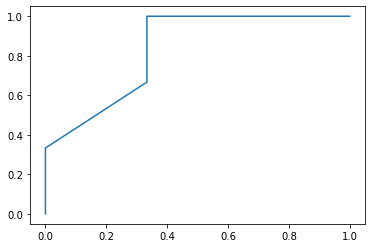

auc: 0.83


In [62]:
m1_x, m1_y, _ = roc_curve(data['decision'], data['method1'])
plt.plot(m1_x, m1_y)
plt.show()
auc = roc_auc_score(data['decision'], data['method1'])
print(f'auc: {auc:.2f}')

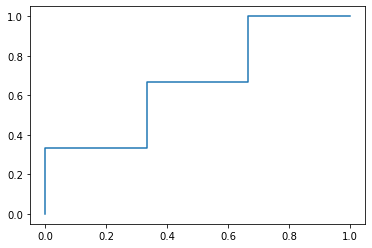

auc: 0.67


In [63]:
m2_x, m2_y, _ = roc_curve(data['decision'], data['method2'])
plt.plot(m2_x, m2_y)
plt.show()
auc = roc_auc_score(data['decision'], data['method2'])
print(f'auc: {auc:.2f}')

Method 1 is better for prediction because it has a higher AUC value (0.83 vs 0.67).